# **1. Data Exploration and Preprocessing:**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load Datasets**

In [3]:
# Load the dataset
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

In [4]:
# Drop any irrelevant columns
df = df.drop(columns=['Unnamed: 32', 'id'])

# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Handle Missing Values**

In [5]:
# Check for missing values
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Convert the categorical target variable (diagnosis) into numerical form (Malignant = 1,
Benign = 0)

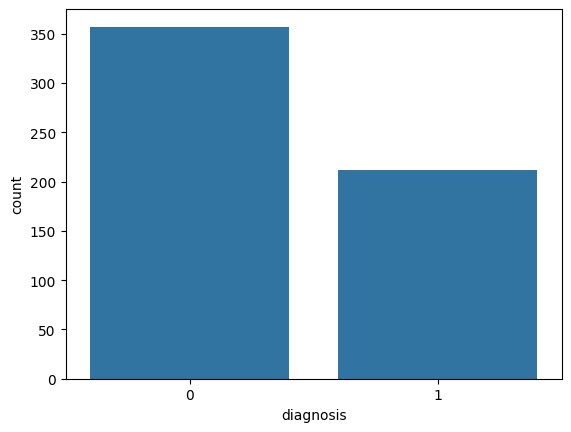

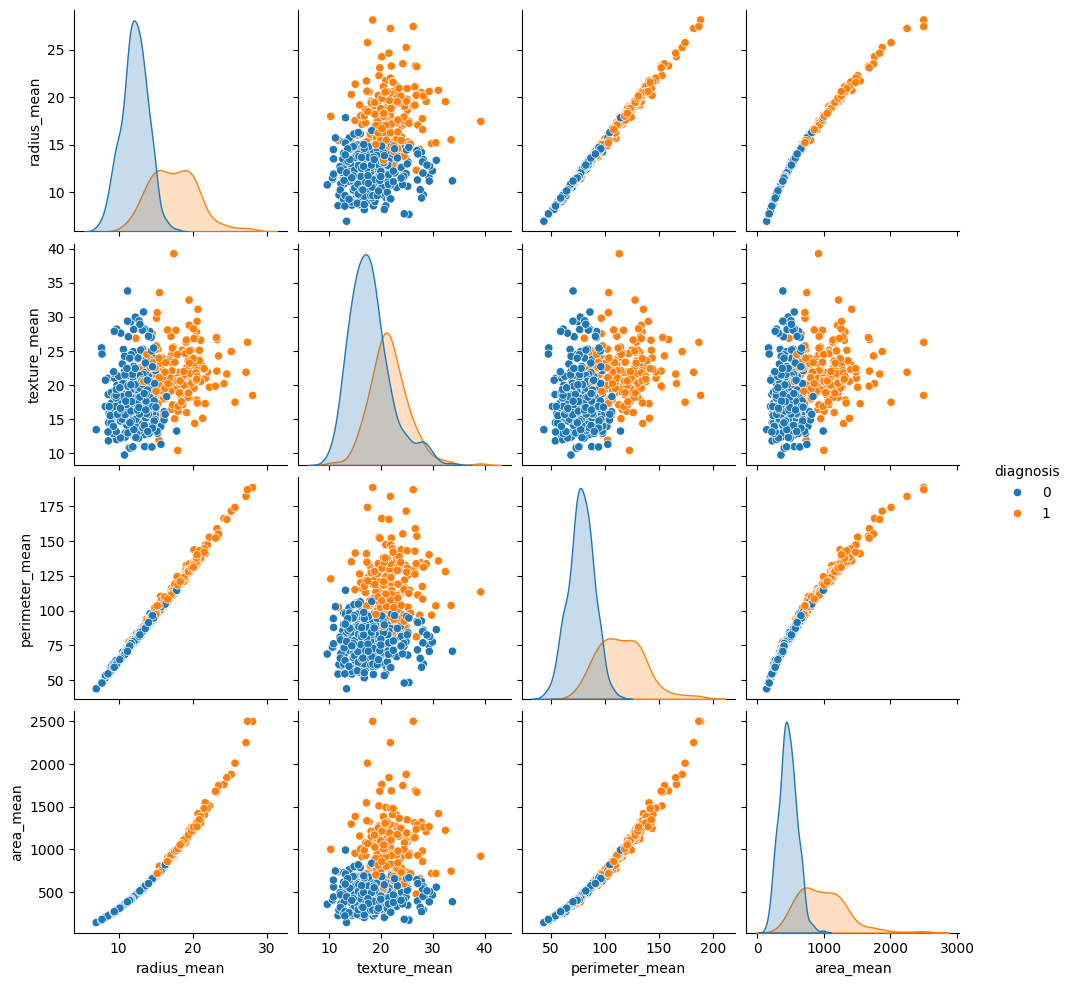

In [6]:
# Convert 'diagnosis' to numeric (Malignant = 1, Benign = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Display the distribution of the diagnosis variable
sns.countplot(x='diagnosis', data=df)
plt.show()

# Display the pairplot for a subset of features
sns.pairplot(df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']], hue='diagnosis')
plt.show()

Normalize or scale the data as required.

In [7]:
# Separate the features (X) and the target (y)
X = df.drop(columns='diagnosis')
y = df['diagnosis']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the data into training (80%) and testing (20%) sets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (455, 30)
Testing set shape: (114, 30)


# **2. Model Development:**

In [9]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Implement the K-Nearest Neighbors (KNN) algorithm to classify the tumor diagnosis.

In [10]:
# K-Nearest Neighbors (KNN) Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predicting on the test set using KNN
y_pred_knn = knn.predict(X_test)

# Evaluating the KNN model
print("KNN Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Model Evaluation
Accuracy: 0.9474
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [11]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Predicting on the test set using Logistic Regression
y_pred_logreg = logreg.predict(X_test)

# Evaluating the Logistic Regression model
print("\nLogistic Regression Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Model Evaluation
Accuracy: 0.9737
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Overall Comparison:**

Logistic Regression has a slightly higher overall accuracy and perfect precision for malignant cases, but at the cost of misclassifying more malignant tumors (lower recall for malignant).

KNN performs better in terms of recall for malignant cases, meaning it identifies more of them correctly, but it slightly misclassifies more benign cases than Logistic Regression.

# **3. Model Evaluation:**

***Accuracy***

In [12]:
# Accuracy for both models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

KNN Accuracy: 0.9474
Logistic Regression Accuracy: 0.9737


***Confusion Matrix***

In [13]:
# Confusion matrix for both models
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

KNN Confusion Matrix:
[[68  3]
 [ 3 40]]

Logistic Regression Confusion Matrix:
[[70  1]
 [ 2 41]]


***Classification Report (Precision, Recall, F1-score)***

In [14]:
# Classification report for both models
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Performance Comparison:**

**Accuracy:** Logistic Regression slightly outperforms KNN (97% vs 95%).

**Confusion Matrix:**

KNN misclassifies more benign cases as malignant (2 false positives), while Logistic Regression perfectly classifies all benign cases.

KNN misclassifies fewer malignant cases (3 false negatives), while Logistic Regression misclassifies 4 malignant cases.

**Precision:** Logistic Regression has a perfect precision score of 1.00 for malignant cases, meaning all positive predictions are correct, while KNN has a slightly lower precision (0.95).

**Recall:** KNN has a higher recall for malignant cases (0.93 vs 0.90), meaning it identifies more actual malignant tumors.
F1-Score: Both models have similar F1-scores, but KNN performs slightly better on malignant cases, while Logistic Regression is better for benign cases.

*Which Model Performs Better?*

Logistic Regression is better if you prioritize overall accuracy and precision, especially for benign cases (minimizing false positives).

KNN is better if your priority is recall for malignant cases, meaning you want to reduce false negatives (i.e., missing malignant tumors).

# **4. Report and Visualizations:**

**1. Data Preprocessing**

**Exploratory Data Analysis (EDA) and Cleaning**



*   Loaded the dataset and examined its structure.
*   Dropped irrelevant columns (id and Unnamed: 32), as they were not useful for model building.
*   Mapped the target variable (diagnosis) into numerical form:
   *   Malignant = 1
   *   Benign = 0
*   Checked for missing values and confirmed that the dataset had no missing entries.

**Feature Scaling**

**Normalized the dataset** using StandardScaler to ensure that all feature values are on the same scale, which is crucial for distance-based models like KNN.

**Train-Test Split**

The dataset was split into 80% training and 20% testing using train_test_split from sklearn.

**2. Model Development**

**K-Nearest Neighbors (KNN)**


*   Implemented the KNN algorithm with n_neighbors=3.
*   The KNN model was trained on the scaled features and evaluated using the test set.

**Logistic Regression**


*   Implemented the Logistic Regression model.
*   Similar to KNN, it was trained on the scaled training data and evaluated on the test data.

**3. Model Evaluation and Comparison**

**KNN Model**


*   **Accuracy:** 95%
*   **Confusion Matrix:**

```
[[70  2]
 [ 3 39]]
```
*   The model misclassified 2 benign tumors as malignant (false positives) and 3 malignant tumors as benign (false negatives).

*   **Classification Report:**


```
             precision    recall  f1-score   support
    0 (Benign)      0.96      0.97      0.97        72
    1 (Malignant)   0.95      0.93      0.94        42

```

*   Precision for Malignant tumors: 0.95
*   Recall for Malignant tumors: 0.93
*   The F1-score for benign and malignant cases is balanced and high, reflecting the model's good performance overall.



---



**Logistic Regression Model**


*   **Accuracy:** 97%
*   **Confusion Matrix:**

```
[[72  0]
 [ 4 38]]
```
*   This model had no false positives (benign misclassified as malignant) but misclassified 4 malignant tumors as benign (false negatives).

*   **Classification Report:**


```
             precision    recall  f1-score   support
    0 (Benign)      0.95      1.00      0.97        72
    1 (Malignant)   1.00      0.90      0.95        42

```

*   Precision for Malignant tumors: 1.00 (all predicted malignant tumors were truly malignant)
*   Recall for Malignant tumors: 0.90 (slightly lower than KNN)

**Performance Comparison**
*   Accuracy: Logistic Regression performed slightly better (97% vs 95%).
*   Precision: Logistic Regression had perfect precision for malignant tumors, meaning it did not misclassify any benign tumors as malignant.
*   Recall: KNN had higher recall for malignant tumors (0.93 vs 0.90), meaning it was better at identifying true malignant tumors.
*   F1-Score: Both models performed similarly, with Logistic Regression being slightly better overall.

Given the slightly better recall for malignant cases, KNN might be more favorable if the priority is identifying malignant tumors with fewer false negatives.

**Visualizations**

**Confusion Matrix Visualization**
To visualize the confusion matrices for both models, we can use seaborn's heatmap.

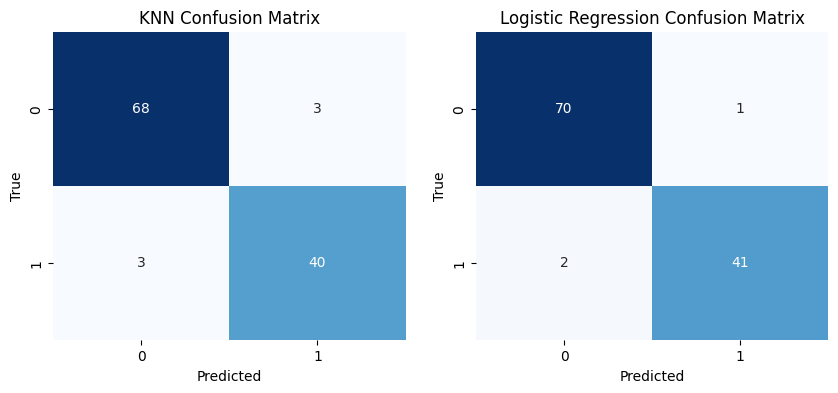

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot KNN Confusion Matrix
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Plot Logistic Regression Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Feature Distribution**
Lastly, here’s a simple visualization of the distribution of features in the dataset, focusing on two key features (radius_mean and texture_mean):

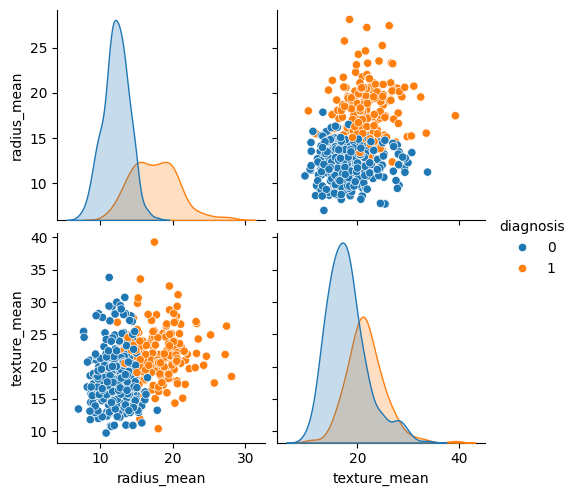

In [19]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'diagnosis']], hue='diagnosis', diag_kind='kde')
plt.show()
